In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

# Economic Order Quantity (EOQ) 20 pts

### 1. What are the EOQs for A and B? What are the annual setup and holding costs for A and B?

Economic Order Quantity (EOQ) using the formula:
$$ Q^* = \sqrt{\frac{2DK}{H}} $$

Where:
- \( D \) is the annual demand for the product
- \( K \) is the setup or ordering fixed cost per order
- \( h \) is the holding or carrying cost per unit per year


In [ ]:
import math
# Given values for product A and B
D_A = 3000  # annual demand for A
D_B = 3600  # annual demand for B
K = 200     # setup cost per order
H_A = 105   # holding cost per unit per year for A
H_B = 120   # holding cost per unit per year for B

# Calculate EOQ for product A and B
Q_A = math.sqrt((2 * D_A * K) / H_A)
Q_B = math.sqrt((2 * D_B * K) / H_B)

# Print EOQ
print("Economic Order Quantity for Product A:", round(Q_A))
print("Economic Order Quantity for Product B:", round(Q_B))


Economic Order Quantity for Product A: 107
Economic Order Quantity for Product B: 110


Calculating Annual Setup and Holding Costs
- $$ \text{Annual Setup Costs} = \frac{D}{Q^*} \times K $$

- $$ \text{Annual Holding Costs} = \frac{Q^*}{2} \times h $$

In [ ]:
# Calculate annual setup costs for A and B
annual_setup_costs_A = (D_A / Q_A) * K
annual_setup_costs_B = (D_B / Q_B) * K

# Calculate annual holding costs for both products
annual_holding_costs_A = (Q_A / 2) * H_A
annual_holding_costs_B = (Q_B / 2) * H_B

# Print annual costs for both products
print("Annual Setup Costs for Product A: ${:.2f}".format(annual_setup_costs_A))
print("Annual Holding Costs for Product A: ${:.2f}".format(annual_holding_costs_A))
print("Annual Setup Costs for Product B: ${:.2f}".format(annual_setup_costs_B))
print("Annual Holding Costs for Product B: ${:.2f}".format(annual_holding_costs_B))


Annual Setup Costs for Product A: $5612.49
Annual Holding Costs for Product A: $5612.49
Annual Setup Costs for Product B: $6572.67
Annual Holding Costs for Product B: $6572.67


### 2. Currently the store has a storage constraint tha t it can only hold 60 units of A and 75 units of B. What will be the optimal order quanti- ties for A and B? What will be the resulting annual setup and holding costs? (Assume that the space for A cannot be used for B and vice versa.)

Adjusted Order Quantities Due to Storage Constraints

The storage constraints allow for a maximum of 60 units of A and 75 units of B.




In [ ]:
Q_A_adjusted = 60  # adjusted EOQ for product A due to storage limits
Q_B_adjusted = 75  # adjusted EOQ for product B due to storage limits

# Calculate new annual setup costs for both products
annual_setup_costs_A_adjusted = (D_A / Q_A_adjusted) * K
annual_setup_costs_B_adjusted = (D_B / Q_B_adjusted) * K

# Calculate new annual holding costs for both products
annual_holding_costs_A_adjusted = (Q_A_adjusted / 2) * H_A
annual_holding_costs_B_adjusted = (Q_B_adjusted / 2) * H_B

# Display the calculated costs
print("Adjusted Annual Setup and Holding Costs for Product A:")
print("Optimal Order Quantity: 60")
print("Setup Costs: ${:.2f}".format(annual_setup_costs_A_adjusted))
print("Holding Costs: ${:.2f}".format(annual_holding_costs_A_adjusted))
print("\nAdjusted Annual Setup and Holding Costs for Product B:")
print("Optimal Order Quantity: 75")
print("Setup Costs: ${:.2f}".format(annual_setup_costs_B_adjusted))
print("Holding Costs: ${:.2f}".format(annual_holding_costs_B_adjusted))

Adjusted Annual Setup and Holding Costs for Product A:
Optimal Order Quantity: 60
Setup Costs: $10000.00
Holding Costs: $3150.00

Adjusted Annual Setup and Holding Costs for Product B:
Optimal Order Quantity: 75
Setup Costs: $9600.00
Holding Costs: $4500.00


### 3. Let T denote time between successive orders. What will be the optimal T if you wants to minimize the total setup and holding cost? What are the corresponding order quantities?

By jointly ordering both products A and B, the fixed cost for both proudct is $400 for any order size

  - Product A: 3000 units per year
  - Product B: 3600 units per year
  - Product A: $105 per unit per year
  - Product B: \$120 per unit per year

  - Based on the time between orders (T), the order quantities are:
    - Q_A = D_A * T
    - Q_B = D_B * T

Total Annual Cost Function
Minimize the total setup and holding costs combined, calculated as:
$$
G(T) = \frac{400}{T} + \frac{H_A \times D_A \times T}{2} + \frac{H_B \times D_B \times T}{2}
$$


In [ ]:
from sympy import symbols, Eq, solve, diff
import sympy as sp

# Define symbol for T
T = symbols('T', positive=True, real=True)

# Given values
new_K = 400  # combined setup cost

# Define the total cost function G(T)
G_T = (new_K / T) + (H_A * D_A * T / 2) + (H_B * D_B * T / 2)

# Calculate the derivative of G(T) with respect to T
dG_dT = sp.diff(G_T, T)

# Solve for optimal T
optimal_T = sp.solve(sp.Eq(dG_dT, 0), T)

# Calculate optimal order quantities for A and B based on T
Q_A_optimal = D_A * optimal_T[0]
Q_B_optimal = D_B * optimal_T[0]

# Display the output
print("Optimal Time Between Orders (T): {:.4f} years or {:.2f} days".format(optimal_T[0], optimal_T[0] * 365))
print("Optimal Order Quantity for Product A:", round(Q_A_optimal))
print("Optimal Order Quantity for Product B:", round(Q_B_optimal))


Optimal Time Between Orders (T): 0.0327 years or 11.94 days
Optimal Order Quantity for Product A: 98
Optimal Order Quantity for Product B: 118


### 4. What is the resulting total setup and holding cost? How does it compare to the cost in part 1 when you order A and B separately? Explain why.

In [ ]:
optimal_T_val = 0.033
# Calculate number of orders per year
number_of_orders_per_year = 1 / optimal_T_val

# Calculate total setup cost annually
total_setup_cost_joint = new_K * number_of_orders_per_year

# Calculate holding costs annually
holding_cost_A_annual = (D_A * optimal_T_val / 2) * H_A
holding_cost_B_annual = (D_B * optimal_T_val / 2) * H_B
total_holding_cost_joint = holding_cost_A_annual + holding_cost_B_annual

# Print the results
print("Total Setup Cost Annually: ${:.2f}".format(total_setup_cost_joint))
print("Total Holding Cost Annually for Product A: ${:.2f}".format(holding_cost_A_annual))
print("Total Holding Cost Annually for Product B: ${:.2f}".format(holding_cost_B_annual))
print("Total Joint Holding Cost: ${:.2f}".format(total_holding_cost_joint))

Total Setup Cost Annually: $12121.21
Total Holding Cost Annually for Product A: $5197.50
Total Holding Cost Annually for Product B: $7128.00
Total Holding Cost Jointly: $12325.50


Calculated Costs
- **Joint Ordering Total Cost:** \$12,121.21 annual setup ccost + \$12,325.50 annual holding cost =  \$24,446.71
- **Separate Ordering Total Cost:** \$5,612.49 Annual Setup Costs for A  +  \$5,612.49 Annual Holding Costs for A + \$6,572.67 Annual Setup Costs for B + \$6,572.67 Annual Holding Costs for B = \$24,370.32

Cost Difference
Joint ordering results in a slightly higher cost \$24,446.71 compared to separate ordering \$24,370.32, with a difference of \$76.39.

Cost Differences could due to:
1. **Holding Costs**: Joint ordering may increase holding costs due to larger quantities being stored.
2. **Setup Costs**: The reduction in the frequency of orders in joint ordering does not fully compensate for the increased holding costs.
3. **Inventory Optimization**: Separate ordering allows for more tailored inventory management, potentially optimizing costs more effectively.

## Conclusion
While joint ordering simplifies operations, it doesn't always guarantee cost savings over separate ordering, especially when products have different demand rates and holding costs!


# Supply Chain Contract

### 1. Based on the given discrete distribution, what are the overage and underage costs and how many baklavas should Nergis make at the start of each day?

cost = 15 cents

price = 50 cents

salvage price = 0

$C_o$ = cost - salvage price = 15 - 0 = 15 cents

$C_u$ = price - cost = 50 - 15 = 35 cents


F(Q) = 35/50 = 0.7

The closest cumulative probability less than or equal to 0.7 is 0.47 at 20 baklavas sold in a day. Therefore, Nergis should make 20 baklavas at the start of each day.

### 2. Suppose baklavas unsold at the end of the dat are purchased for 5 cents each. What are the overage and underage costs in this case? How many baklavas should Nergis make at the start of each day?

cost = 15 cents

price = 50 cents

salvage price = 5 cents

$C_o$ = cost - salvage price = 15 - 5 = 10 cents

$C_u$ = price - cost = 50 - 15 = 35 cents


F(Q) = 35/45 = 0.78

The closest cumulative probability that is less than or equal to 0.78 is 0.72 at 25 baklavas sold in a day. Therefore, Nergis should make 25 baklavas at the start of each day.

### 3. Nergis buys baklavas from Cemile every morning at 20 cents each and sells them for 50 cents. In addition, to promote the sales of baklavas, Cemile’s store buys back the leftover baklavas at the end of the day from Nergis at 7 cents. What are the overage and underage costs in this case? How many baklavas should Nergis buy at the start of each day?

cost = 20 cents

price = 50 cents

salvage price = 7 cents

$C_o$ = cost - salvage price = 20 - 7 = 13 cents

$C_u$ = price - cost = 50 - 20 = 30 cents


F(Q) = 30/43 = 0.7

The closest cumulative probability less than or equal to 0.7 is 0.47 at 20 baklavas sold in a day. Therefore, Nergis should buy 20 baklavas at the start of each day.

### 4. Nergis still buys the baklavas from Cemile every morning at 20 cents each and sells them for 50 cents. But now, instead of buying back the unsold units, Cemile agrees to pay Nergis a rebate of 2 cents for every unit sold to end customers at Nergis’s. What are the overage and underage costs in this case? How many baklavas should Nergis buy at the start of the day?

cost = 20 cents

price = 50 cents + 2 cents of rebate

salvage price = 0 cents

$C_o$ = cost - salvage price = 20 - 0 = 20 cents

$C_u$ = price - cost = 52 - 20 = 32 cents


F(Q) = 32/52 = 0.615

The closest cumulative probability less than or equal to 0.615 is 0.47 at 20 baklavas sold in a day. Therefore, Nergis should buy 20 baklavas at the start of each day.

# Aroma Bakery Case Study

### 1. What are some of the factors that must be considered by the store manager while making the decisions of placing orders for the bakery products.

Some key factors the store managers should consider are:

* Historical sales data for each store
  * store location can affect trend

* Price of each product
* Cost of making each product
* How unsold products are managed
* Inventory for products that can be sold the next day
* Upcoming events like festivals or holidays that may impact demand
* Weather conditions

### 2. Given the historical sales data, what are possible methods that can be applied by the store manager to decide the optimum order quantity?

The store manager can use the costs of overage and underage to find the cumulative distribution function of demand. Then, use the probability given to find the optimal demand, suggesting order quantity, given the trend of historical sales data.

### 3. Calculate the expected profit from the historical sales data

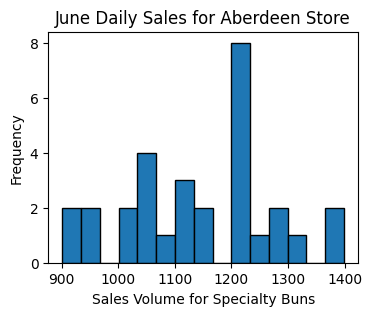

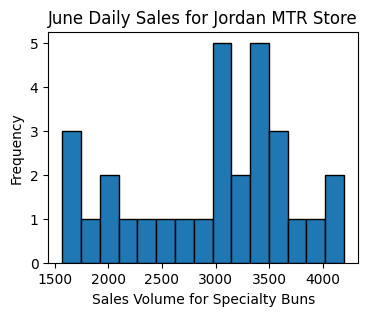

In [ ]:
import matplotlib.pyplot as plt

# Store daily sales data in lists
aberdeen_sales = [966, 1047, 927, 952, 1033, 1315, 1219, 1232, 1399, 1216, 1216, 1388, 1230, 1250, 1145, 1213, 1034, 1083, 1222, 1118, 1292, 1128, 1044, 1007, 901, 1107, 1140, 1231, 1272, 1052]

jordan_sales = [2542, 3010, 1626, 1677, 2754, 3900, 3480, 3569, 4198, 2283, 2238, 4029, 3406, 3561, 3193, 3489, 1870, 1967, 3390, 3094, 3360, 3109, 2912, 1938, 1571, 3046, 3206, 3554, 3808, 2992]

# Plot histogram for Aberdeen store
plt.figure(figsize=(4,3))
plt.hist(aberdeen_sales, bins=15, edgecolor='black')
plt.title('June Daily Sales for Aberdeen Store')
plt.xlabel('Sales Volume for Specialty Buns')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Jordan MTR store
plt.figure(figsize=(4,3))
plt.hist(jordan_sales, bins=15, edgecolor='black')
plt.title('June Daily Sales for Jordan MTR Store')
plt.xlabel('Sales Volume for Specialty Buns')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

aberdeen_mean = np.mean(aberdeen_sales)
aberdeen_median = np.median(aberdeen_sales)
aberdeen_min = np.min(aberdeen_sales)
aberdeen_max = np.max(aberdeen_sales)
aberdeen_std = np.std(aberdeen_sales)

print(f"Aberdeen Store Statistics:")
print(f"Mean: {aberdeen_mean:.2f}")
print(f"Median: {aberdeen_median}")
print(f"Min: {aberdeen_min}")
print(f"Max: {aberdeen_max}")
print(f"Standard Deviation: {aberdeen_std:.2f}")

jordan_mean = np.mean(jordan_sales)
jordan_median = np.median(jordan_sales)
jordan_min = np.min(jordan_sales)
jordan_max = np.max(jordan_sales)
jordan_std = np.std(jordan_sales)

print(f"\nJordan MTR Store Statistics:")
print(f"Mean: {jordan_mean:.2f}")
print(f"Median: {jordan_median}")
print(f"Min: {jordan_min}")
print(f"Max: {jordan_max}")
print(f"Standard Deviation: {jordan_std:.2f}")

Aberdeen Store Statistics:
Mean: 1145.97
Median: 1142.5
Min: 901
Max: 1399
Standard Deviation: 129.68

Jordan MTR Store Statistics:
Mean: 2959.07
Median: 3101.5
Min: 1571
Max: 4198
Standard Deviation: 739.27


In [ ]:
def empirical_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(len(sorted_data)) / float(len(sorted_data))
    return sorted_data, cdf

aberdeen_cdf = empirical_cdf(aberdeen_sales)
jordan_cdf = empirical_cdf(jordan_sales)

def optimal_Q(data, c_o, c_u):
    data.sort()
    cdf_vals = np.arange(len(data)) / float(len(data))
    c_ratio = c_u / (c_o + c_u)

    idx = np.searchsorted(cdf_vals, c_ratio)
    Q_opt = data[idx]

    return Q_opt

avg_sp = 7.8
avg_cost = 3.12

c_o = avg_cost - 0  # Overage cost per unit
c_u = avg_sp - avg_cost  # Underage cost per unit

aberdeen_Q_opt = optimal_Q(aberdeen_sales, c_o, c_u)
jordan_Q_opt = optimal_Q(jordan_sales, c_o, c_u)

print(f"Optimal Order Quantity:")
print(f"Aberdeen Store: {int(aberdeen_Q_opt)}")
print(f"Jordan MTR Store: {int(jordan_Q_opt)}")

Optimal Order Quantity:
Aberdeen Store: 1216
Jordan MTR Store: 3360


In [ ]:
# find expected profit
# Expected Profit = (Avg Selling Price - Avg Product Cost) x Expected Sales Quantity

# for Aberdeen Store
aberdeen_e_profit = (avg_sp - avg_cost) * aberdeen_Q_opt

# for Jordan MTR Store
jordan_e_profit = (avg_sp - avg_cost) * jordan_Q_opt


print(f"Expected Profit for specialty buns:")
print(f"Aberdeen Store: ${round(aberdeen_e_profit,2)}")
print(f"Jordan MTR Store: ${round(jordan_e_profit,2)}")

Expected Profit for specialty buns:
Aberdeen Store: $5690.88
Jordan MTR Store: $15724.8


### 4. What are some ways (qualitative) to potentially improve the sales performance of the store? can you suggest some ways to improve the transshipment among stores and make it an attractive and systematic proposition for store managers ?

Some ways to improve sales performance:

* Optimize the mix of products at each store based on demand patterns
* Do promotions and discounts occassionally
* Improve on demand forecasting by looking at more factors such as weather and holidays
* Optimize store layout and product placement to potentially increase purchases

For transshipment:

* Optimize transshipment routes to minimize transportation costs
* Use a centralized system to provide franchise-wide inventory levels
* Set up a transshipment protocol among nearby stores
* Provide incentives for transferring unsold inventory to meet other store's demand such as discounted cost and salvage cost.

# QR policy 15 points

 ### 1. What is the optimal lot size (order quantity) and reorder level?

The EOQ is calculated using the formula:
$$Q = \sqrt{\frac{2DK}{h}}$$



The reorder point \(R\) is determined to ensure stock availability during the lead time, calculated as:
$$R = \mu_L + z \sigma_L$$
where:
- μ_L is the mean demand during the lead time,
- σ_L is the standard deviation of the demand during the lead time,
- Z is the safety factor (z-score) corresponding to the desired service level.


Convert monthly demand to a weekly basis to align with the 14-week lead time:
- **Weekly Demand Mean**:
  $$\mu_{\text{weekly}} = \frac{\mu_{\text{monthly}}}{4.33}$$
- **Weekly Demand Standard Deviation**:
  $$\sigma_{\text{weekly}} = \frac{\sigma_{\text{monthly}}}{4.33}$$
- **Lead Time Demand Mean**:
  $$\mu_L = \mu_{\text{weekly}} \times 14$$ (since the lead time is 14 weeks)
- **Lead Time Demand Std Dev**:
  $$\sigma_L = \sigma_{\text{weekly}} \times \sqrt{14}$$


In [ ]:
import math

# Declare variables
mean_monthly = 28  # Monthly mean demand
sigma_monthly = 8  # Monthly standard deviation
lead_time_weeks = 14  # Replenishment lead time in weeks
cost_per_can = 6  # Cost per can of paint
stockout_cost_per_unit = 10  # Stockout cost per unit
fixed_replenishment_cost = 15  # Fixed cost per replenishment order
holding_cost_rate = 0.30  # Annual holding cost rate
weeks_per_month = 4.33  # Weeks per month

# Convert monthly demand statistics to weekly
mu_weekly = mean_monthly / weeks_per_month
sigma_weekly = sigma_monthly / weeks_per_month

# Calculate lead time demand statistics
mu_L = mu_weekly * lead_time_weeks
sigma_L = sigma_weekly * math.sqrt(lead_time_weeks)

# Annual demand
annual_demand = mean_monthly * 12

# Holding cost per unit per year
holding_cost_per_unit_per_year = cost_per_can * holding_cost_rate

# Calculate EOQ
Q = math.sqrt((2 * annual_demand * fixed_replenishment_cost) / holding_cost_per_unit_per_year)

# Determine z-score for a service level; assume 95% service level
z_score = 1.645  # Standard z-score for 95% confidence (one-sided)

# Calculate Reorder Point R
R = mu_L + z_score * sigma_L

# Output the results
print(f"Optimal Order Quantity (Q): {Q:.2f} cans")
print(f"Reorder Point (R): {R:.2f} cans")

Optimal Order Quantity (Q): 74.83 cans
Reorder Point (R): 101.90 cans


### 2. What is the expected inventory level (safety stock) just before an order arrives? you can stop after 4 iterations in this case.

- **Expected Inventory Level \((I)\)** just before an order arrives:
  $$
  I = R - \mu_L + SS
  $$


- **Safety Stock \((SS)\)**:
  $$
  SS = z \sigma_L
  $$
  

- **Reorder Point \((R)\)**:
  $$
  R = \mu_L + SS
  $$

Variables
- **Weekly Demand Mean**:
  $$\mu_{\text{weekly}} = \frac{\mu_{\text{monthly}}}{4.33}$$

- **Weekly Demand Standard Deviation**:
  $$\sigma_{\text{weekly}} = \frac{\sigma_{\text{monthly}}}{4.33}$$

- **Lead Time**: in weeks,

- **Lead Time Demand Mean**:
  $$\mu_L = \mu_{\text{weekly}} \times \text{Lead Time}$$

- **Lead Time Demand Standard Deviation**:
  $$\sigma_L = \sigma_{\text{weekly}} \times \sqrt{\text{Lead Time}}$$



In [ ]:
import math
import scipy.stats as stats

# Declare variables
mu_monthly = 28  # Monthly mean demand
sigma_monthly = 8  # Monthly standard deviation
weeks_per_month = 4.33  # Average number of weeks in a month
lead_time = 14  # Lead time in weeks

# Convert monthly demand to weekly
mu_weekly = mu_monthly / weeks_per_month
sigma_weekly = sigma_monthly / weeks_per_month

# Calculate lead time demand
mu_L = mu_weekly * lead_time
sigma_L = sigma_weekly * math.sqrt(lead_time)

# Assume a service level corresponding to a 95% confidence interval
z = stats.norm.ppf(0.95)

# Calculate safety stock
SS = z * sigma_L

# Calculate reorder point
R = mu_L + SS

# Expected inventory level just before an order arrives
I = R - mu_L + SS

# Output the results
print(f"Mean lead time demand (mu_L): {mu_L:.2f}")
print(f"Standard deviation of lead time demand (sigma_L): {sigma_L:.2f}")
print(f"Safety Stock (SS): {SS:.2f}")
print(f"Reorder Point (R): {R:.2f}")
print(f"Expected Inventory Level just before the order arrives (I): {I:.2f}")


Mean lead time demand (mu_L): 90.53
Standard deviation of lead time demand (sigma_L): 6.91
Safety Stock (SS): 11.37
Reorder Point (R): 101.90
Expected Inventory Level just before the order arrives (I): 22.74


# NewsVendor Simulation 15 points

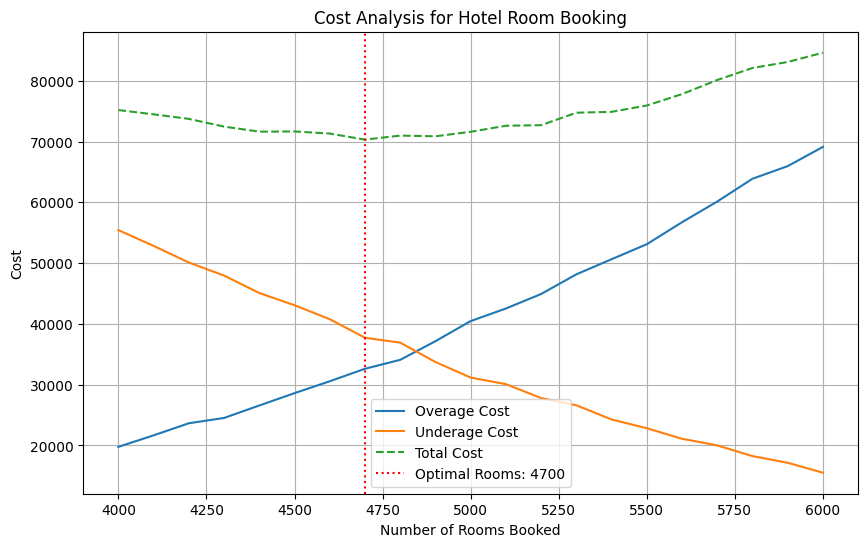

The optimal number of rooms to book is 4700.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input parameters
mean_demand = 5000
std_dev_demand = 2000
cu = 40  # Underage cost
co = 50  # Overage cost

# Define the range of rooms to be simulated (rounded to the nearest hundred)
rooms_range = np.arange(4000, 6001, 100)

# Number of simulations
num_simulations = 10000

# Function to simulate demand and calculate costs
def simulate_costs(rooms_booked, mean_demand, std_dev_demand, cu, co, num_simulations):
    demands = np.random.normal(mean_demand, std_dev_demand, num_simulations)
    overage_costs = co * np.maximum(0, rooms_booked - demands)
    underage_costs = cu * np.maximum(0, demands - rooms_booked)
    total_costs = overage_costs + underage_costs
    return np.mean(overage_costs), np.mean(underage_costs), np.mean(total_costs)

# Initialize lists to store results
overage_costs_list = []
underage_costs_list = []
total_costs_list = []

# Run simulations for each booking scenario
for rooms in rooms_range:
    avg_overage_cost, avg_underage_cost, avg_total_cost = simulate_costs(
        rooms, mean_demand, std_dev_demand, cu, co, num_simulations)
    overage_costs_list.append(avg_overage_cost)
    underage_costs_list.append(avg_underage_cost)
    total_costs_list.append(avg_total_cost)

# Find the optimal number of rooms to book
optimal_rooms_index = np.argmin(total_costs_list)
optimal_rooms = rooms_range[optimal_rooms_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(rooms_range, overage_costs_list, label='Overage Cost')
plt.plot(rooms_range, underage_costs_list, label='Underage Cost')
plt.plot(rooms_range, total_costs_list, label='Total Cost', linestyle='--')
plt.axvline(optimal_rooms, color='r', linestyle=':', label=f'Optimal Rooms: {optimal_rooms}')
plt.xlabel('Number of Rooms Booked')
plt.ylabel('Cost')
plt.title('Cost Analysis for Hotel Room Booking')
plt.legend()
plt.grid(True)
plt.show()

# Output the optimal number of rooms to book
print(f"The optimal number of rooms to book is {optimal_rooms}.")